연습용

Python Data Science Handbook by Jake Vander Plas(O'Reilly). Copyright 2017 Jake VanderPlas, 978-1-491-91205-8

### 파이썬 정수는 정수 이상이다

- 파이썬의 정수는 C 구조체로 구성되어 있음

struct _longobject {

    long ob_refcnt; 파이썬이 메모리 할당과 해제를 처리할 수 있게 돕는 참조 횟수
    
    PyTypeObject * ob_type; 변수 타입을 인코딩
    
    size_t ob_size; 다음 데이터 멤버의 크기를 지정
    
    long ob_digit[1]; 파이썬 변수가 나타내는 실제 정숫값을 포함
    
}

- 위와 같이 타입에 대한 객체로 관리하기 때문에 동적 타이핑이 가능
- 유연하지만 더 느리다

### 파이썬 리스트는 리스트 이상이다
- 동적타이핑으로 인해 리스트는 서로 다른 데이터 타입의 요소를 담는 리스트를 만들 수 있다

In [1]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
L3 = [1, True, "3", '4']
L3

[1, True, '3', '4']

### 파이썬의 고정 타입 배열
- 데이터를 효율적인 고정 타입 데이터 버퍼에 저장하는 다양한 방식을 제공

In [4]:
import array
L = list(range(10))
A = array.array('i', L) # python 3.3 + 
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

파이썬의 array 객체는 배열 기반의 데이터에 효율적인 저장소를 제공하는 반면, Numpy는 그 데이터에 효율적인 연산을 추가한다. 

In [5]:
import numpy as np

### 파이썬 리스트에서 배열 만들기
- 파이썬 리스트와 달리 NumPy는 배열의 모든 요소가 같은 타입이어야 한다
- 타입이 일치하지 않으면 NumPy는 가능한 경우 상위 타입을 취하게 된다

In [6]:
a = np.array([1,4,2,5,3])
print(a)
b = np.array([1.3,4,2,5,3]) ## 상위 타입인 부동소수점으로 변환됨
print(b)
c = np.array([1.3,4,2,5,3], dtype='float32')
print(c)
d = np.array([1.3,4,2,5,3], dtype='int')
print(d)

[1 4 2 5 3]
[1.3 4.  2.  5.  3. ]
[1.3 4.  2.  5.  3. ]
[1 4 2 5 3]


파이썬 리스트와는 달리 NumPy 배열은 명시적으로 다차원이 가능하다.

In [7]:
np.array([range(i, i+3) for i in [2,4,6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [8]:
np.array([[2,3,4],[4,5,6],[6,7,8]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [9]:
list([[2,3,4],[4,5,6],[6,7,8]])

[[2, 3, 4], [4, 5, 6], [6, 7, 8]]

### 처음부터 배열 만들기
규모가 큰 배열의 경우에는 NumPy에 내장된 루틴을 사용해 처음부터 배열을 생성하는 것이 효율적이다

In [10]:
# 0으로 채운 길이 10의 정수 배열 만들기
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# 1로 채운 3x5 부동 소수점 배열 만들기
np.ones((3,5), dtype=int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [12]:
# 3.14로 채운 3x5 배열 만들기
np.full((3,5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [13]:
# 선형 수열로 채운 배열 만들기
# 0에서 시작해 2씩 더해 20까지 채움
# 내장 함수인 range와 유사
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [14]:
# 0과 1 사이에 일정한 간격을 가진 다섯 개의 값으로 채운 배열 만들기
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
# 0과 1 사이의 난수로 채움
np.random.random((3,3))

array([[0.91984185, 0.70896833, 0.92574365],
       [0.85113984, 0.07181001, 0.16247149],
       [0.28408717, 0.54028138, 0.8149024 ]])

In [16]:
# 정규 분포(평균=0, 표준 편차=1)의 난수로 채운 3x3 배열 만들기
np.random.normal(0,1, (3,3))

array([[ 0.73714803,  1.11003075, -0.48953496],
       [-0.32286403,  1.15307182, -0.64876546],
       [-0.45524521,  0.07106586,  0.0928029 ]])

In [17]:
# [0,10] 구간의 임의의 정수로 채운 3x3 배열 만들기
np.random.randint(0, 10, (3,3))

array([[6, 7, 0],
       [7, 8, 8],
       [1, 4, 3]])

In [18]:
# 3x3 단위 행렬 만들기
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
# 세 개의 정수를 가지는 초기화되지 않은 배열 만들기
# 값을 해당 메모리 위치에 이미 존재하고 있는 값으로 채움
np.empty(3)

array([1., 1., 1.])

## NumPy 배열의 기초
Pandas도 NumPy 배열을 기반으로 만들어졌다. 

##### 배열 속성 지정
배열의 크기, 모양, 메모리 소비량, 데이터 타입을 결정
##### 배열 인덱싱
개별 벼열 요솟값을 가져오고 설정
##### 배열 슬라이싱
큰 배열 내에 있는 작은 하위 배열을 가져오고 설정
##### 배열 재구조화
해당 배열의 형상을 변경
##### 배열 결합 및 분할
여러 배열을 하나로 결합하고 하나의 배열을 여러 개로 분할

### NumPy 배열 속성 지정

In [20]:
# 항상 같은 난수가 생성될 수 있도록 난수 코드를 지정
np.random.seed(0) 

x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3,4))
x3 = np.random.randint(10, size=(3,4,5))

print(x1.ndim)  # 배열의 차원
print(x2.shape) # 배열의 모양
print(x3.size)  # 배열의 크기
print(x3.dtype) # 배열의 데이터 타입
print(x3.itemsize) # 배열의 요소의 크기를 바이트 단위로
print(x3.nbytes) # 배열의 전체 크기를 바이트 단위로

1
(3, 4)
60
int32
4
240


### 배열 인덱싱: 단일 요소에 접근하기

In [21]:
# 일차원 배열의 접근
print(x1)
print(x1[0])
print(x1[-1])

[5 0 3 3 7 9]
5
9


In [22]:
# 다차원 배열의 접근
print(x2)
print(x2[0,0])
print(x2[2,-1])

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
3
7


### 배열 슬라이싱: 하위 배열에 접근하기
콜론(:) 기호로 표시되는 슬라이스 표기법으로 하위 배열에 접근할 수 있다. NumPy 슬라이싱 구문은 표준 파이썬 리스트의 구문을 따른다. 

In [23]:
x= np.array(range(10))
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [24]:
print(x[1:3])
print(x[1:])
print(x[1:-2])
print(x[::2])
print(x[::-1])

[1 2]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7]
[0 2 4 6 8]
[9 8 7 6 5 4 3 2 1 0]


### 사본이 아닌 뷰로서의 하위 배열
배열 슬라이스가 배열 데이터의 사본(copy)가 아니라 뷰(view)를 반환한다는 점. 이는 NumPy 배열 슬라이싱이 파이썬 리스트 슬라이싱과 다른 점 중 하나. 리스트에서 슬라이스는 사본이다. 

In [25]:
print(x2)
sliceX2 = x2[:2,:2]
sliceX2

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5],
       [7, 6]])

In [26]:
sliceX2[0,0] = 99
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [27]:
# copy 명령을 이용하여 복사를 할 수 있음
sliceX2 = x2[:2,:2].copy()
sliceX2[0,0] = 123

print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### 배열 재구조화
배열의 형상을 변경. reshape()

In [28]:
# 배열의규모가 변경될 규모와 일치해야 한다 (가능하면 뷰를 사용하지만 연속되지 않은 메모리 버퍼일 경우에는 복사가 이루어질 수도 있음)
x1 = np.arange(1, 10)
x2 = x1.reshape(3, 3)

print(x1)
print(x2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [29]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [30]:
x.reshape(1,3)

array([[1, 2, 3]])

In [31]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [32]:
x.reshape(3,1)

array([[1],
       [2],
       [3]])

In [33]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

### 배열 연결 및 분할
하나의 배열을 여러 개의 배열로 분할하는 것도 가능

##### 배열 연결

In [34]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [35]:
grid = np.array([[1,2,3],
                [4,5,6]])

np.concatenate([grid, grid]) # 기본 axis= 0

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [36]:
np.concatenate([grid,grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [37]:
x = np.array([1,2,3])
grid = np.array([
                 [9,8,7],
                 [6,5,4]
                ])

In [38]:
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [39]:
y = np.array([[99],
              [99]])
np.hstack([y,grid])

array([[99,  9,  8,  7],
       [99,  6,  5,  4]])

### 배열 분할하기

In [40]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3, x4 = np.split(x, [3,5,6])
print(x1, x2, x3, x4)

[1 2 3] [99 99] [3] [2 1]


In [41]:
grid = np.arange(16).reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [42]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [43]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### NumPy 배열 연산: 유니버설 함수

NumPy 배열의 연산을 빠르게 만드는 핵심은 벡터화(vectorized) 연산을 사용하는 것인데, 그것은 일반적으로 NumPy의 유니버설 함수를 통해 구현된다

##### 루프는 느리다
파이썬은 인터프리터 언어이기 때문에 느리다. JIT 컴파일 하는 파이썬. C코드로 변환하는 사이썬 프로젝트, 파이썬 코드 조각을 LLVM 바이트 코드로 변환하는 넘바 프로젝트가 있다(장단 점이 있다고 한다)

In [44]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(values) # 크기를 키우고 성능 테스트를 할 경우 매우 느림을 알 수 있음

2.3 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### UFuncs

여러 종류의 연산에 대해 컴파일된 루틴에 편리한 인터페이스를 제공. 이를 벡터화 연산이라고 한다. 
간단히 배열에 연산을 수행해 각 요소에 적용함으로써 수행할 수 있다. 루프를 NumPy의 기저를 이루는 컴파일된 계층으로 밀어 넣음으로써 빠르게 실행되도록 설계 됐다. 

In [45]:
%timeit 1.0/values

4.5 ms ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

##### 집계함수
- np.sum 요소의 합 계산
- np.prod 요소의 곱 계산
- np.mean 요소의 평균 계산
- np.std 표준 편차 계산
- np.var 분산 계싼
- np.min 최솟값 찾기
- np.max 최댓값 찾기
- np.argmin 최솟값의 인덱스
- np.argmax 최댓값의 인덱스
- np.median 중앙값
- np.percentile 요소의 순위 기반 백분위 수 계산
- np.any 요소 중 참이 있는지 검사

- np.all 모든 요소가 참인지 검사

### 배열 연산: 브로드 캐스팅
벡터화 연산의 또 다른 방법. 다른 크기의 배열에 이항 유니버설 함수를 적용하기 위한 규칙의 집합

In [47]:
import numpy as np
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [48]:
a + 5 # 값 5가 더 높은 차원으로 확장하고 연산됨

array([5, 6, 7])

In [49]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [50]:
M + a


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

두 배열 모두 브로드 캐스팅

In [51]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [52]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 브로드 캐스팅 규칙

- 두 배열의 차원 수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽(왼쪽)을 1로 채운다
- 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일차하도록 늘어난다
- 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다

In [53]:
M = np.ones((2,3))
a = np.arange(3)

a.shape

(3,)

In [54]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [55]:
a = np.arange(3).reshape(3,1) 
b = np.arange(3)

In [56]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [57]:
M = np.ones((3,2))
a = np.arange(3)

try:
    M + a
except:
    print('-> (3,2)와 (1,3)')
    print('-> (3,2)와 (3,3) 은 맞지 않음')


-> (3,2)와 (1,3)
-> (3,2)와 (3,3) 은 맞지 않음


In [58]:
M + a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [59]:
# +, - 연산자 뿐만 아니라log(exp(a) + exp(b)) 등에서도 브로드캐스팅 규칙이 적용된다
np.logaddexp(M, a[:,np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### 실전 브로드캐스팅
자주쓰이는 예제

##### 배열을 중앙 정렬하기

In [60]:
X = np.random.random((10,3))
Xmean = X.mean(0)
Xmean

array([0.46110098, 0.49893467, 0.36013246])

In [61]:
X_centered = X - Xmean
X_centered

array([[ 0.14736296,  0.21900803,  0.07023161],
       [-0.20869088,  0.4767899 , -0.24036926],
       [-0.2525321 , -0.25910342,  0.03020778],
       [ 0.15208766,  0.36143593, -0.0136786 ],
       [-0.16716128, -0.10618668,  0.33431049],
       [ 0.25124886,  0.14288258, -0.21493999],
       [ 0.45686835, -0.47092551,  0.17158316],
       [-0.11609482,  0.30802404, -0.28857307],
       [-0.25315294, -0.25342349,  0.41424483],
       [-0.0099358 , -0.41850138, -0.26301694]])

In [62]:
X_centered.mean(0)

array([ 4.44089210e-17, -6.66133815e-17, -3.33066907e-17])

### 2차원 함수 플로팅하기

In [63]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [64]:
%matplotlib inline

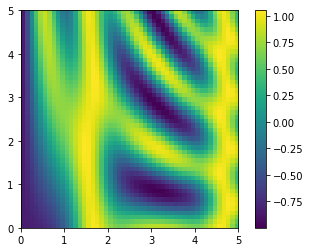

In [65]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

### 비교, 마스크, 부울로직
NumPy 배열 내의 값을 검사하고 조작하는 데 부울 마스크를 사용하는 법을 다룬다. 마스킹은 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산, 조작할 때 사용.

특정 값보다 더 큰 값을 모두 세거나 특정 임계치를 넘어서는 이상치를 모두 제거하려는 경우가 여기에 해당한다.

##### 비온 날 세기

In [66]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254
inches.shape

(365,)

In [67]:
%matplotlib inline

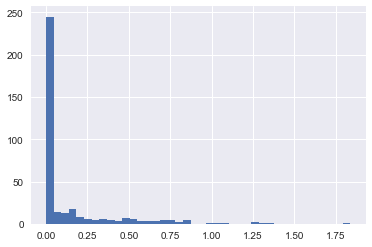

In [68]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40);

### ufunc으로서의 비교 연산자
배열의 요소 단위의 연산 뿐만 아니라 비교 연산자도 지원한다. 비교 연산자의 결과는 항상 Bool 타입의 배열
- <    np.equal
- \>    np.greater
- \>=   np.greater_equal
- <=   np.less_equal
- !=   np.not_equal

In [69]:
a = np.random.randint(10, size=(3,4))
a

array([[7, 6, 0, 9],
       [1, 1, 3, 9],
       [2, 6, 1, 1]])

In [70]:
a > 5

array([[ True,  True, False,  True],
       [False, False, False,  True],
       [False,  True, False, False]])

### 부울 배열로 작업하기
np.sum(), np.any(), np.all()은 파이썬 내장 함수인 sum(), any(), all() 함수와 인자 및 다차원배열 지원 여부 등이 다를 수 있음

In [71]:
a

array([[7, 6, 0, 9],
       [1, 1, 3, 9],
       [2, 6, 1, 1]])

##### 요소 개수 세기

True인 요소의 개수

In [72]:

np.count_nonzero(a < 6)

7

In [73]:
np.sum(a < 6) # 위와 동일

7

In [74]:
# 각 행에 6보다 작은 값이 몇 개일까?
np.sum(a < 6, axis=1)

array([1, 3, 3])

In [75]:
# 8보다 큰 값이 하나라도 있는가?
np.any(a > 8)

True

In [76]:
np.any(a < 0)

False

In [77]:
np.all(a < 10)

True

In [78]:
np.any(a == 6)

True

In [79]:
np.all(a < 8, axis=1)

array([False, False,  True])

##### 부울 연산자
표준 산술 연산자와 마찬가지로 NumPy는 이 연산자를 배열의 요소 단위로 동작하는 유니버설 함수로 오버로딩한다

- & np.bitwise_and
- | np.bitwise_or
- ^ np.bitwise_xor
- ~ np.bitwise_not

In [80]:
np.sum((inches > 0.5) & (inches < 1))

29

##### 마스크로서의 부울 배열

부울 배열을 마스크로 사용해 데이터 자체의 특정 부분 집합을 선택하는 것

In [81]:
a < 5

array([[False, False,  True, False],
       [ True,  True,  True, False],
       [ True, False,  True,  True]])

In [82]:
a[a < 5]

array([0, 1, 1, 3, 2, 1, 1])

In [83]:
rainy = (inches > 0)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

np.median(inches[rainy])

0.19488188976377951

In [84]:
np.median(inches[summer])

0.0

In [85]:
np.max(inches[summer])

0.8503937007874016

In [86]:
np.median(inches[rainy & ~ summer])

0.20078740157480315

and/or vs &/| 연산자

and와 or는 전체 객체의 참과 거짓을 측정하는 반면 &와 |는 각 객체의 비트를 참조한다는 사실에 있다

In [87]:
bool(42 and 0)

False

In [88]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 0], dtype=bool)

try:
    A and B # 전체 객체에 대해 단일 Bool 평가
except:
    print("에러 발생 전체를 비교하는데 배열 2개를 비교할 수 없음")

에러 발생 전체를 비교하는데 배열 2개를 비교할 수 없음


In [89]:
A & B

array([ True, False,  True, False,  True, False])

##### 팬시 인덱싱

한 번에 여러 배열 요소에 접근하기 위해 인덱스의 배열을 전달
팬시 인덱싱을 사용하면 반환값은 인덱싱 대상 배열의 형상이 아니라 브로드캐스팅된 인덱스의 형상을 반영한다

In [90]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [91]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [92]:
ind = [3, 7 , 4]
x[ind]

array([71, 86, 60])

In [93]:
ind = np.array([[3, 7], [2, 4]]) # 이때 [[3, 7], [2, 4]] 단순 배열일 경우 에러 발생
x[ind]

array([[71, 86],
       [14, 60]])

In [94]:
X = np.arange(12).reshape(3,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [95]:
row = np.array([0,1,2])
col = np.array([0,1,2])
X[row, col]

array([ 0,  5, 10])

In [96]:
X[row[:, np.newaxis], col]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [97]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [98]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

##### 결합 인덱싱 (인덱싱 조합)

In [99]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [100]:
X[1, [2,0,1]] # 팬시 인덱싱과 일반 인덱싱 결합

array([6, 4, 5])

In [101]:
X[1:, [2,0,1]] # 팬시 인덱싱과 슬라이싱 결합

array([[ 6,  4,  5],
       [10,  8,  9]])

In [102]:
# 팬시 인덱싱과 마스킹을 결합
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [103]:
# 위와 비교하여 조심하여 사용 (마스킹은 Bool 타입, Bool이 아닌 인덱싱을 넣을 경우 팬시 인덱싱으로 동작함)
mask = np.array([1,0,1,0])
X[row[:, np.newaxis], mask]

array([[1, 0, 1, 0],
       [5, 4, 5, 4],
       [9, 8, 9, 8]])

##### 임의의 점 선택하기
팬시 인덱싱의 보편적인 용도는 행렬에서 행의 부분집합을 선택하는 것

In [104]:
mean = [0,0]
cov = [[1,2],  # 
       [2,5]]  # 

X = rand.multivariate_normal(mean, cov, 100)
X[:5,]

array([[-0.644508  , -0.46220608],
       [ 0.7376352 ,  1.21236921],
       [ 0.88151763,  1.12795177],
       [ 2.04998983,  5.97778598],
       [-0.1711348 , -2.06258746]])

In [105]:
X.shape

(100, 2)

In [106]:
%matplotlib inline

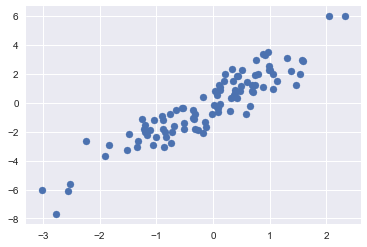

In [107]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1]);

In [108]:
# 임의의 점 20 개 선택 (반복 없이)
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([89, 13, 45, 39, 90, 46, 88, 63, 10, 23, 33, 75, 25, 72, 42, 12, 56,
       66, 37, 94])

In [109]:
selection = X[indices]
selection.shape

(20, 2)

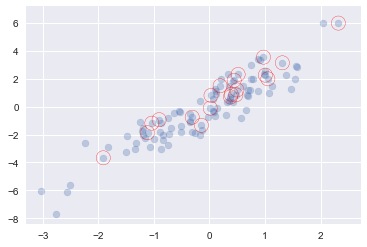

In [110]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200, edgecolors='r');

##### 팬시 인덱싱으로 값 변경하기

배열의 일부를 수정할 수 있음

In [111]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [112]:
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [113]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [114]:
### 반복되는 인덱스는 예상하지 못한 결과를 초래할 수 있다
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x # 4 할당 후 6 할당됨

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
# 모르겠음
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [116]:
x = np.zeros(10) 
np.add.at(x, i, 1) # 팬시 인덱싱이 아닌 별도 API 사용
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

##### 데이터 구간화
데이터를 효율적으로 구간화(binning)해서 직접 히스토그램을 생성할 수 있다.

In [117]:
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)

print(bins)

counts = np.zeros_like(bins)
counts

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [118]:
i = np.searchsorted(bins, x)
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10],
      dtype=int64)

In [119]:
np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

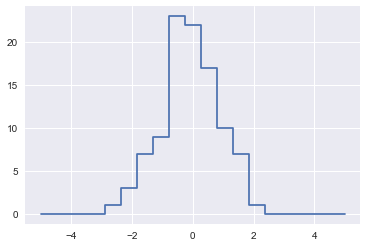

In [120]:
plt.plot(bins, counts, linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

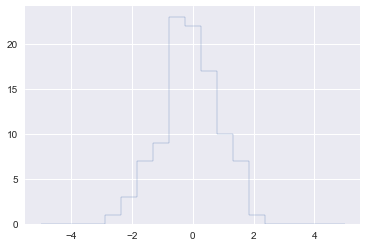

In [121]:
# 위와 동일
plt.hist(x, bins, histtype='step')

In [122]:
x = np.random.randn(100)

counts = np.zeros_like(bins)

%timeit np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

67.5 µs ± 4.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
16.6 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


histogram 이 더 빠르다는 것을 알 수 있음 
대규모 데이터 연산에 더욱 최적화되어 있기 때문에 (적을 때는 더 느릴 수 있음) 

In [123]:
x = np.random.randn(1000000)

counts = np.zeros_like(bins)

%timeit np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

75.6 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
133 ms ± 541 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### 배열 정렬

In [124]:
import numpy as np

# O[n]의 시간 복잡도를 갖는다
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
x = np.array([2,1,4,3,5])
selection_sort(x)    

array([1, 2, 3, 4, 5])

##### NumPy의 빠른 정렬: np.sort와 np.argsort

np.sort는 기본적으로 퀵 정렬 알고리즘을 사용하지만 병합 정렬(mergesort)과 힙 정렬(heapsort)도 사용할 수 있다.

In [125]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [126]:
sortedIdx = np.argsort(x)
sortedIdx

array([1, 0, 3, 2, 4], dtype=int64)

In [127]:
x[sortedIdx]

array([1, 2, 3, 4, 5])

##### 행이나 열 기준으로 정렬하
NumPy 정렬 알고리즘은 axis 인수를 사용해 다차원 배열의 특정 행이나 열을 정렬할 수 있다.

In [128]:
rand = np.random.RandomState(0)
X = rand.randint(0, 10, (4, 6))
print(X)

[[5 0 3 3 7 9]
 [3 5 2 4 7 6]
 [8 8 1 6 7 7]
 [8 1 5 9 8 9]]


In [129]:
np.sort(X, axis=0)

array([[3, 0, 1, 3, 7, 6],
       [5, 1, 2, 4, 7, 7],
       [8, 5, 3, 6, 7, 9],
       [8, 8, 5, 9, 8, 9]])

In [130]:
np.sort(X, axis=1)

array([[0, 3, 3, 5, 7, 9],
       [2, 3, 4, 5, 6, 7],
       [1, 6, 7, 7, 8, 8],
       [1, 5, 8, 8, 9, 9]])

### 부분 정렬: 파티션 나누기
단순히 배열에서 K개의 가장 작은 값을 찾고 싶을 경우 등

In [131]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3) # K(여기서는 3)을 기준으로 왼쪽과 오른쪽으로 정렬됨

array([2, 1, 3, 4, 6, 5, 7])

In [132]:
np.partition(X, 2, axis=1)

array([[0, 3, 3, 5, 7, 9],
       [2, 3, 4, 5, 7, 6],
       [1, 6, 7, 8, 8, 7],
       [1, 5, 8, 9, 8, 9]])

### 예제: k 이웃 알고리즘
집합에서 각 점의 가장 가까운 이웃들을 찾기 위해 여러 축을 따라 argsort 함수를 어떻게 사용하는지 간단히 살펴보자.

In [133]:
X = rand.rand(10, 2)
X

array([[0.64817187, 0.36824154],
       [0.95715516, 0.14035078],
       [0.87008726, 0.47360805],
       [0.80091075, 0.52047748],
       [0.67887953, 0.72063265],
       [0.58201979, 0.53737323],
       [0.75861562, 0.10590761],
       [0.47360042, 0.18633234],
       [0.73691818, 0.21655035],
       [0.13521817, 0.32414101]])

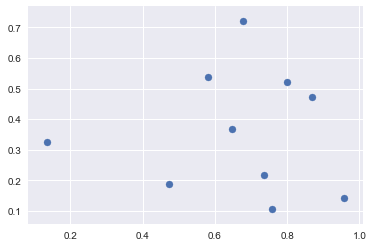

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1])

각 쌍의 점 사이의 거리를 계산. 두 점 사이의 거리 제곱은 각 차원 간의 차이를 제곱해서 더한 값과 같다는 사실을 기억
(벡터의 거리, distance)

In [135]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis = -1)
dist_sq

array([[0.        , 0.14740487, 0.06034854, 0.04650495, 0.12512246,
        0.03298163, 0.08101691, 0.06356615, 0.03088612, 0.26506635],
       [0.14740487, 0.        , 0.11864122, 0.16890862, 0.41416438,
        0.29835337, 0.04060428, 0.23593949, 0.0543107 , 0.70935926],
       [0.06034854, 0.11864122, 0.        , 0.00698213, 0.09758155,
        0.08704886, 0.14762954, 0.23972914, 0.08381266, 0.56237297],
       [0.04650495, 0.16890862, 0.00698213, 0.        , 0.05495371,
        0.04819872, 0.17365706, 0.21878503, 0.09646675, 0.48169462],
       [0.12512246, 0.41416438, 0.09758155, 0.05495371, 0.        ,
        0.04296583, 0.38424473, 0.32761634, 0.25746745, 0.4527733 ],
       [0.03298163, 0.29835337, 0.08704886, 0.04819872, 0.04296583,
        0.        , 0.21734867, 0.13498446, 0.12692083, 0.24509967],
       [0.08101691, 0.04060428, 0.14762954, 0.17365706, 0.38424473,
        0.21734867, 0.        , 0.08770181, 0.0127126 , 0.4362502 ],
       [0.06356615, 0.23593949, 0.2397291

In [136]:
X[:,np.newaxis,:].shape

(10, 1, 2)

In [137]:
# 대각 성분들이 모두 0
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [138]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 8, 5, 3, 2, 7, 6, 4, 1, 9],
       [1, 6, 8, 2, 0, 3, 7, 5, 4, 9],
       [2, 3, 0, 8, 5, 4, 1, 6, 7, 9],
       [3, 2, 0, 5, 4, 8, 1, 6, 7, 9],
       [4, 5, 3, 2, 0, 8, 7, 6, 1, 9],
       [5, 0, 4, 3, 2, 8, 7, 6, 9, 1],
       [6, 8, 1, 0, 7, 2, 3, 5, 4, 9],
       [7, 0, 8, 6, 9, 5, 3, 1, 2, 4],
       [8, 6, 0, 1, 7, 2, 3, 5, 4, 9],
       [9, 7, 5, 0, 8, 6, 4, 3, 2, 1]], dtype=int64)

In [139]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[0, 8, 5, 3, 2, 7, 6, 4, 1, 9],
       [1, 6, 8, 2, 0, 3, 5, 7, 4, 9],
       [3, 2, 0, 8, 5, 4, 6, 7, 1, 9],
       [2, 3, 0, 5, 4, 1, 6, 7, 8, 9],
       [4, 5, 3, 2, 0, 1, 6, 7, 8, 9],
       [5, 0, 4, 3, 2, 8, 7, 6, 1, 9],
       [6, 8, 1, 0, 7, 5, 2, 3, 4, 9],
       [7, 0, 8, 6, 9, 5, 1, 3, 2, 4],
       [6, 8, 0, 1, 7, 5, 2, 3, 4, 9],
       [5, 9, 7, 0, 1, 3, 6, 2, 8, 4]], dtype=int64)

In [140]:
#nearest_partition = np.partition(dist_sq, K + 1, axis=1)
#nearest_partition

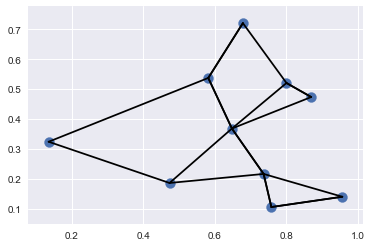

In [141]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

In [142]:
X = np.array([[3,1,2],
             [6,6,3]])
X

array([[3, 1, 2],
       [6, 6, 3]])

### 대문자 O (Big-O) 표기법

N=1000인 리스트 연산이 1초가 걸리는 O[N]('N차'라고 읽음') 알고리즘을 가지고 있을 때
N=5000인 리스트 연산이 5초가 걸릴 것이라 예상된다

길이 N = 1000인 경우에 1초가 걸리는 O[N^2] 이라면 N=5000이라면 25초가 걸릴 것으로 예상할 수 있다.

### 구조화된 데이터: NumPy의 구조화된 배열

NumPy에서 복합적인 이종 데이터를 효율적으로 저장하기 위한 구조화된 배열과 레코드 배열에 관해 학습

In [1]:
# 다양한 종류의 데이터를 표현하기 위해 index를 일치시킨 배열 세개를 만들 수 있다
# 이 경우 세 배열의 연관성을 파악하기 어렵다
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [4]:
import numpy as np
x = np.zeros(4, dtype=int) # 평소 쓰던 방법

In [6]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'i8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<i8')]


In [7]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55) ('Bob', 45, 85) ('Cathy', 37, 68) ('Doug', 19, 61)]


In [8]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')